# Module 0.1 - Secrets Setup and Python

_PAS4AI Workforce Summer 2024_

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joonbugs/My-Test-Repository/blob/main/Large_Language_Models.ipynb)

# LLM Rules:
You may freely use the `simple_chat` function provided below after you set up your API keys. You may not use any other LLM. 

This LLM has been preprompted to not share code or function names. (If you can manage to get it to give them to you, that's fine too. (You should share how you managed it in the #social channel and we can discuss it!)) You'll also find that this llm has no memory - as we'll see on Thursday, all llm calls are stateless, so we have to provide the past conversation if we want it to "remember" it.

You should put all prompts that you used in cells either immediately before or after an "Answer" cell. If you use the llm to find out what a function does, you should also search for that answer online and see if you can find it/understand the documentation - state this as a comment in your answer cell.

# Part 1: Discord and Proxy Key Setup
As part of a project this week, we're going to be working on implementing a discord bot. We'll go ahead and set up that bot now and make sure we can use the key. We'll also set up a key for the course proxy and use that to call a simple llm.

1. Visit the Discord Developer Portal ([link](https://discord.com/developers)) and Log In with the same Discord account as the one registered for the PAS4AI Server.
2. Click "New Application"

<img src="https://www.rorytm.com/pas4ai/image1.jpg" alt="Step 2 Image" width="800"/>

3. Create an application (name doesn't really matter) & agree to Discord's Developer Terms
4. Copy the *Application ID*

<img src="https://www.rorytm.com/pas4ai/image2.jpg" alt="Step 4 Image" width="800"/>

5. Go to the OAuth2 tab (you may need to widen your browser window so that it appears)

<img src="https://www.rorytm.com/pas4ai/image3.jpg" alt="Step 5 Image" width="800"/>

6. Under *Redirects* - add `https://pas4ai.rorytm.com`
7. Go to the Bot sidebar and enable the *Message Content Intent* slider (as shown in the image)

<img src="https://www.rorytm.com/pas4ai/image4.jpg" alt="Step 7 Image" width="800"/>

8. Also in the Bot sidebar - press the *Reset Token* button (and copy the new token code / string) for your records.
9. Next, send a message to **Pan** in the #pans-playground channel on Discord asking to add your bot. Include your *Application ID* from step 4.
10. While you're here, you should also ask **Pan** for an API key, which will then be DMd to you. Save this as well.
11. Next, we're going to add these to your colab secrets so that we can get them in the future without having to save them in the notebooks. (You should never include either of these in plain text or print them anywhere.)

12. On the left side of this notebook, click on the key icon. Here, click "Add new secret" and create each of the following key:value pairs:
- proxy_key: the API key that Pan DMd you
- discord_key: the private token from step 8.

13. Finally, click the toggle next to each one so that they can be accessed by this notebook. (Note: you'll need to repeat this step for each notebook that you want to use them in.)

<img src="https://www.rorytm.com/pas4ai/image5.jpg" alt="Step 14 Image" width="400"/>


# Next, let's test that our keys work. Run these three cells without modifying them.

If the first has an error, make sure you've correctly added and enabled the secrets above.

If either of the remaining two have an error, go back up and make sure your keys are correct.

If you need help, put a message in your private discord channel with @Rory.

In [ ]:
# This cell will load our keys from the secrets.
import requests
import json
from google.colab import userdata

PROXY_KEY = userdata.get('proxy_key')
DISCORD_KEY = userdata.get('discord_key')

In [ ]:
# This cell will return information about the discord bot.
def test_discord_bot_token(token):
    url = "https://discord.com/api/v10/users/@me"
    headers = {
        "Authorization": f"Bot {token}"
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        print("The token is valid.")
        print("Bot information:")
        bot_info = response.json()
        print(json.dumps(bot_info, indent=4))

    else:
        print("The token is invalid or something went wrong.")
        print(f"Response code: {response.status_code}")
        print("Response message:")
        print(response.text)

test_discord_bot_token(DISCORD_KEY)

In [ ]:
# This cell will show some llm prompt examples.
def simple_chat(message):
    url = "https://pas4ai.rorytm.com/api/module1-simple-chat"
    headers = {
        "Authorization": f"Bearer {PROXY_KEY}"
    }
    body = {
        "message": message
    }

    response = requests.post(url, headers=headers, json=body, timeout=None)

    result = ""
    if response.status_code == 200:
        response_body = response.content.decode("utf-8")
        result += json.loads(response_body)

    else:
        result += "The token is invalid or something went wrong.\n"
        result += f"Response code: {response.status_code}\n"
        result += "Response message:\n"
        result += response.text

    return result

print(simple_chat("What is Python3?"))
print('\n'*5)
print(simple_chat("Use a for loop to sum the first 12 primes"))


# Part 2: Intros
- Why you’re here:
  - Hopes for AI?
  - Hopes for ASD in the workplace?
- What your background is:
  - Academic
  - Professional
- Hobbies/Experiences:
  - Activities
  - Projects
  - Unusual Experiences
- Interests:
  - Your background in the interest
  - The interest itself

## Question 1:
Pick 4 of the topics above and, for each, write out what you would say/cover in a 3-6 sentence intro. Also give a separate, 1-2 sentence statement on why you chose that topic.

## Answer 1:

### Topic 1 Intro:


### Topic 1 Reason:


### Topic 2 Intro:


### Topic 2 Reason:


### Topic 3 Intro:


### Topic 3 Reason:


### Topic 4 Intro:


### Topic 4 Reason:




# Part 3: Group Preferences

## Question 2:
Thinking about the team contract items discussed in class, choose 3 items that you consider the most important to you. For each item, list your preference and give a 1-3 sentence explanation of why it's important to you.

## Answer 2:




### Item 1:


### Item 2:


### Item 3:



# Part 4: Python Fundamentals
Some part of this material is adapted from SureStart's curriculum.

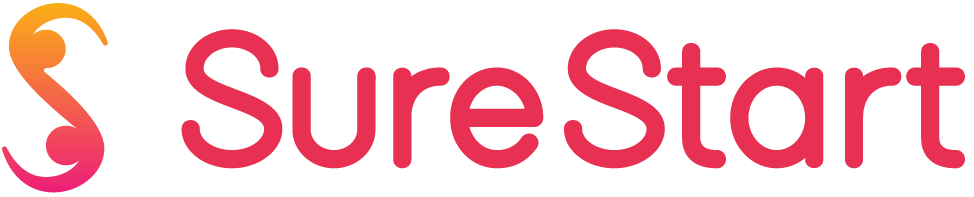

# What is Python?

Python is a high-level, interpreted programming language that is widely used for
* Web development,
* Data analysis,
* Artificial intelligence, and
* Scientific computing.

It was created by Guido van Rossum and released in 1991.

# Why are we using Python in this curriculum?

Python has become one of the most popular languages for building deep learning models due to its **simplicity**, **readability**, and the **availability of many useful libraries** for scientific computing, data analysis, and machine learning.

Python frameworks provide a high-level API that makes it easier to build and train deep *neural networks*.

Python's object-oriented design and dynamic typing allow for efficient experimentation and prototyping of new deep learning models.

# Inputs and Outputs

In Python, the standard input (stdin) and standard output (stdout) are used for communicating with the user and other programs.

By default, stdin represents the keyboard input, and stdout represents the console output.

However, you can redirect these input and output streams to read from or write to a file or another program.

## Output Functionality in Python: `print()`

To print output in Python, you can use the built-in `print()` function. See some usage examples below.

In [ ]:
# Print a simple message to the console
print("Hello, world!")

# Print the value of a variable
x = 10
print("The value of x is:", x)

# Print multiple values using string formatting
name = "Alice"
age = 25
print("My name is {} and I'm {} years old.".format(name, age))

# Print using f-strings (Python 3.6 and later)
print(f"My name is {name} and I'm {age} years old.")

## Input Functionality in Python: `input()`

In Python, you can use the built-in `input()` function to take input from the user.

In [ ]:
# Prompt the user for two numbers and add them together
num1 = int(input("Enter the first number: "))
num2 = int(input("Enter the second number: "))
result = num1 + num2
print("The sum of", num1, "and", num2, "is", result)

## Question 3

Write a program which uses the `input()` functionality to take 5 numbers in one go from the user (as a response to a single prompt `'Enter five numbers: '`) and prints each of the number separately in a new line.

E.g.,

Input: `1 2 3 4 5`.
Output:
```
1
2
3
4
5
```

Hint: You will need to use the `print`, `input` and `string_variable.split()` functions. If you don't remember the `.split()` functionality, do a web search for it.

### Answer 3

# Building Blocks of Deep Learning: Mutable and Immutable Data Types


## Mutable Data Types

In Python, **mutable data types** are those that **can be modified** after they have been created. This means that you can change the value of an existing object without creating a new object.

Mutable data types can be useful in situations where you need to modify data structures **in place**, rather than creating new objects every time you need to make a change.

However, you need to be careful when working with mutable data types, as modifying them can have unintended consequences, especially if they are shared between different parts of your code.

Below we review three mutable data types: Lists, Dictionaries, and Sets.

### Lists

Lists are a **sequence of values** that can be modified by adding, removing, or changing elements. For example, you can append new elements to a list, remove elements from a list, or change the value of an element in a list.

Lists are often used to **represent datasets or batches of data**. A dataset is a collection of input-output pairs that are used to train or evaluate a machine learning model.

In [ ]:
# Creating a list of numbers
numbers = [1, 2, 3, 4, 5]
print('Current list: ', numbers)
print('-'*100)

# Accessing list elements
print('The first number in the list: ', numbers[0])  # Output: 1
print('The third number in the list: ', numbers[2])  # Output: 3
print('-'*100)

# Slicing a list
print('The second to third numbers in the list: ', numbers[1:3])  # Output: [2, 3]
print('-'*100)

# Modifying list elements
numbers[0] = 10
print('The list with the modified first number: ', numbers)  # Output: [10, 2, 3, 4, 5]
print('-'*100)

# Adding elements to a list
numbers.append(6)
print('The list with a new number added to the rear: ', numbers)  # Output: [10, 2, 3, 4, 5, 6]
print('-'*100)

# Removing elements from a list
numbers.remove(3)
print('The list with number "3" removed from it: ', numbers)  # Output: [10, 2, 4, 5, 6]
print('-'*100)

# Looping through a list
print('Iterating over each number in the list:')
for number in numbers:
    print(number, end=" ")

### Question 4

Write a program which uses `input()` to take 5 numbers in one go (from one prompt), stores all 5 numbers in a list, and prints the list in the reverse order.

E.g.,

Input: `1 2 3 4 5`.
Output: `['5', '4', '3', '2', '1']`

Hint: Explore what `list_name[-1]` does.

#### Answer 4

### Dictionaries

Dictionaries are a **collection of key-value pairs** that can be modified by adding, removing, or changing elements. For example, you can add new key-value pairs to a dictionary, remove key-value pairs from a dictionary, or change the value associated with a key in a dictionary.

Dictionaries are often used to represent mappings between keys and values, such as labels and their corresponding indices.

For example, in an image classification task, you might have image labels such as "cat", "dog", and "bird". Python dictionaries can be used to map these labels to integer indices:  `label_to_index = {"cat": 0, "dog": 1, "bird": 2}`. Here `"cat"`, `"dog"` and `"bird"` are the keys, and 0, 1, 2 are the corresponding values of each keys, respectively.

Within the model being developed for the image classification task, these integer indices are actually the values that the model learns to output, but to eventually make the output more human-readable, we map the integer indices back to the string labels using the `label_to_index` dictionary.

Below is a code snippet that shows the various functions that can be used to create and manipulate dictionaries in Python.


In [ ]:
# Creating a dictionary of student names and their grades
grades = {'Alice': 90, 'Bob': 80, 'Charlie': 70}
print('Current dictionary: ', grades)
print('-'*100)

# Accessing dictionary values
print('Grade of Alice: ', grades['Alice'])  # Output: 90
print('-'*100)

# Modifying dictionary values
grades['Bob'] = 85
print('Grades dictionary with Bob\'s modified grade: ', grades)  # Output: {'Alice': 90, 'Bob': 85, 'Charlie': 70}
print('-'*100)

# Adding items to a dictionary
grades['Dave'] = 95
print('Grades dictionary with Dave\'s grade added: ', grades)  # Output: {'Alice': 90, 'Bob': 85, 'Charlie': 70, 'Dave': 95}
print('-'*100)

# Removing items from a dictionary
del grades['Charlie']
print('Grades dictionary with Charlie\'s grade removed: ', grades)  # Output: {'Alice': 90, 'Bob': 85, 'Dave': 95}
print('-'*100)

# Looping through a dictionary
print('Iterating over each student\'s grade:')
for name, grade in grades.items():
    print(name + " scored " + str(grade))

### Question 5

Given the dictionary in the codeblock below, sort the dictionary in ascending order of the values in the key-value pairs. Print the sorted dictionary.


E.g.,

Given Input: `{'1one': 185, 'Two2': 848, 'a3': 268}`,

Output: `{'1one': 185, 'a3': 268, 'Two2': 848}`.

#### Answer 5

Solution without using an anonymous function with `lambda` keyword

In [ ]:
dictionary = {'1one': 185, 'Two2': 848, 'a3': 268}

# Enter your code here:




### Sets

Sets are an **unordered collection of unique elements** that can be modified by adding or removing elements. For example, you can add new elements to a set, remove elements from a set, or perform set operations like union, intersection, and difference.

In some cases, deep learning datasets may contain duplicate examples or labels. Sets can be used to efficiently **remove duplicates** from a list or array.

Below is a code snippet that shows the various functions that can be used to create and manipulate sets in Python.

In [ ]:
# Creating a set of unique integers
numbers = {1, 2, 3, 4, 5}
print('Current set: ', numbers)
print('-'*100)

# Adding elements to a set
numbers.add(6)
print('Numbers set with a new number "6" added: ', numbers)  # Output: {1, 2, 3, 4, 5, 6}
print('-'*100)

# Removing elements from a set
numbers.remove(3)
print('Numbers set with number "3" removed: ', numbers)  # Output: {1, 2, 4, 5, 6}
print('-'*100)

# Checking if an element is in a set
print('Is number "2" in the set?', 2 in numbers)  # Output: True
print('Is number "3" in the set?', 3 in numbers)  # Output: False
print('-'*100)

# Set operations
set1 = {1, 2, 3, 4}
set2 = {3, 4, 5, 6}

print('Taking union of two sets: ', set1.union(set2))  # Output: {1, 2, 3, 4, 5, 6}
print('-'*100)

print('Taking intersection of two sets: ', set1.intersection(set2))  # Output: {3, 4}
print('-'*100)

print('Taking difference of two sets: ', set1.difference(set2))  # Output: {1, 2}
print('-'*100)

print('Taking symmetric difference of two sets: ', set1.symmetric_difference(set2))  # Output: {1, 2, 5, 6}
print('-'*100)

### Question 6

Given two sets, remove the elements from the first set, which are not present in the second set. Print the modified first set.

E.g.,

First given set: `{1 2 3 4 5}`,

Second given set: `{2 4 6 7}`,

Output: `{1 3 5}`.

#### Answer 6

In [ ]:
set1 = {1, 2, 3, 4, 5}
set2 = {2, 4, 6, 7}

# Enter your code here:





## Immutable Data Types

In Python, **immutable data types** are those that cannot be modified after they have been created. This means that if you want to change the value of an immutable object, you must create a new object with the desired value.

Immutable data types are useful in situations where you want to ensure that the value of an object **remains constant** throughout your program.

For example, if you want to use a string as a dictionary key, you should use an immutable string object, as a mutable string object could change its value and cause the dictionary key to become invalid.

Additionally, immutable data types are often **more efficient** than mutable data types, as they can be cached and reused when their value is needed multiple times.

Below we review three immutable data types: Strings, Tuples and Numbers

### Strings

Strings are a **sequence of characters** that cannot be modified in place. If you want to change the value of a string, you must create a new string with the desired value.

Strings are commonly used to **represent text data**, such as natural language sentences or labels.

Below is a code snippet that shows the various functions that can be used to create and manipulate strings in Python.

In [ ]:
# Creating a string
my_string = "Hello, World!"
print('Current string: ', my_string)
print('-'*100)

# Accessing characters in a string
print('First character of the string: ', my_string[0])  # Output: 'H'
print('Last character of the string: ',my_string[-1])  # Output: '!'
print('-'*100)

# Slicing a string
print('First 5 letters of the string: ',my_string[0:5])  # Output: 'Hello'
print('All the letters starting with the 8th letter in the string: ',my_string[7:])  # Output: 'World!'
print('-'*100)

# Concatenating strings
name = "Alice"
greeting = "Hello, " + name + "!"
print('Updated string: ',greeting)  # Output: 'Hello, Alice!'
print('-'*100)

# String methods
print('String in lower case: ',my_string.lower())  # Output: 'hello, world!'
print('String in upper case: ',my_string.upper())  # Output: 'HELLO, WORLD!'
print('Replacing a word in the string: ',my_string.replace('World', 'Python'))  # Output: 'Hello, Python!'
print('-'*100)

# Formatting strings
age = 30
print("I am {} years old".format(age))  # Output: 'I am 30 years old'
print(f"I am {age} years old")  # Output: 'I am 30 years old'
print('-'*100)

### Question 7

A palindrome is a word, number, phrase, or other sequence of characters which reads the same backward and forward, such as "madam" or "racecar". There are also numeric palindromes, including date/time stamps such as 11/11/11 11:11 and 02/02/2020.

Write a function `is_palindrome(s)` to determine whether a given string s is a palindrome or not.

Test the code by exploring numeric and alphanumeric examples that are palindromes and those that are not palindromes.

Hint:

`string_variable.split()` splits a string into a list of characters

`array_variable[::-1]` reverses an array

#### Answer 7

### Tuples

Tuples are an ordered collection of elements that cannot be modified in place. If you want to change the value of a tuple, you must create a new tuple with the desired value.

A model training function may need to **return multiple values**, such as both the output of a deep learning model and its corresponding loss value.

A tuple would be an useful data type for such an output. Using a tuple, we can bundle these values together and return them as a single object.

Below is a code snippet that shows the various functions that can be used to create and manipulate tuples in Python.

In [ ]:
# Creating a tuple
my_tuple = (1, 2, 3, "four", 5.0)
print('Current tuple: ', my_tuple)
print('-'*100)

# Accessing elements in a tuple
print('First item of the tuple: ', my_tuple[0])  # Output: 1
print('Fourth item of the tuple: ', my_tuple[3])  # Output: 'four'
print('-'*100)

# Slicing a tuple
print('Second to fourth items of the tuple: ', my_tuple[1:4])  # Output: (2, 3, 'four')
print('-'*100)

# Attempting to modify a tuple (will result in an error)
try:
  my_tuple[0] = 10  # Output: TypeError: 'tuple' object does not support item assignment
except Exception as e:
  print(e)
print('-'*100)

# Unpacking a tuple
a, b, c, d, e = my_tuple
print('First unpacked item from the tuple: ', a)  # Output: 1
print('Fifth unpacked item from the tuple: ', e)  # Output: 5.0
print('-'*100)

# Tuple methods
print('Length of the tuple: ', len(my_tuple))  # Output: 5
print('Count of "2" in the tuple: ', my_tuple.count(2))  # Output: 1
print('Index of "four" in the tuple: ', my_tuple.index("four"))  # Output: 3

### Question 8

Given a list of tuples, convert it into a dictionary.

E.g.,

Given Input: `[("text",5), ("number","a")]`,

Output: `{'text': 5, 'number': 'a'}`.

#### Answer 8

In [ ]:
list_of_tuples = [("text",5), ("number","a")]

# Enter your code here:





### Numbers

Numeric data types like integers, floats, and complex numbers are also immutable in Python. If you want to change the value of a number, you must create a new number with the desired value.

In most deep learning tasks, input data is represented as numerical features.

For example, in an image classification task, **each pixel value** in the input image can be represented as a floating-point number between 0 and 1.

Below we review various numerical operations in Python.

In [ ]:
# Integer
a = 5
b = 10

# Float
c = 3.14159
d = 2.71828

# Addition
sum = a + b
print('Sum of ' + str(a) + ' and ' + str(b) + ' is ' + str(sum))  # Output: 15

# Subtraction
diff = b - a
print('Difference between ' + str(b) + ' and ' + str(a) + ' is ' + str(diff))  # Output: 5

# Multiplication
prod = a * b
print('Product of ' + str(a) + ' with ' + str(b) + ' is ' + str(prod))   # Output: 50

# Division
quotient = b / a
print('Quotient of division of ' + str(b) + ' by ' + str(b) + ' is ' + str(quotient))   # Output: 2.0 (always returns a float)
print('-'*100)

# Integer division (returns the floor of the division result)
floor_div = b // a
print('Quotient of division without remainder of ' + str(b) + ' by ' + str(b) + ' is ' + str(floor_div))   # Output: 2

# Modulo (returns the remainder of division)
remainder = b % a
print('Remainder of division of' + str(b) + ' by ' + str(b) + ' is ' + str(remainder))  # Output: 0
print('-'*100)

# Exponentiation
exp = c ** 2
print('Exponential of c to the 2nd power is ', exp)  # Output: 9.8695871
print('-'*100)

# Built-in functions
print('Absolute value of -10 is ', abs(-10))  # Output: 10
print('Rounded value of pi is ', round(3.14159, 2))  # Output: 3.14
print('Maximum values in a list of numbers from 1 to 5 is ', max(1, 2, 3, 4, 5))  # Output: 5
print('Minimum value in a list of numbers from 1 to 5 is ', min(1, 2, 3, 4, 5))  # Output: 1


### Question 9

Write a program that takes in a sequence of 5 numbers and stores the square of those numbers in a list. Print the list of squared values.

E.g.:

Input numbers: `1 2 3 4 5`

Output: `[1 4 9 16 25]`

#### Answer 9

# Loop Statements

Loops are used to execute a block of code **repeatedly**.

There are two main types of loops in Python: for loops and while loops.

Loops are an important part of programming in Python, as they allow you to automate repetitive tasks and **iterate over large datasets**.

It is important to use loops judiciously and optimize them for performance, as they can be computationally heavy, if used improperly.

## `For` loop

`For` loops are used to iterate over a sequence of values, such as a list, tuple, or string.

Below is a code snippet that shows the various examples of loop use.

In [ ]:
# Loop over a list
fruits = ["apple", "banana", "cherry"]
print('Printing fruits:')
for fruit in fruits:
    print(fruit)
print('-'*100)

# Loop over a range of numbers
print('Printing numbers:')
for i in range(5):
    print(i)
print('-'*100)

# Loop over a range of numbers with a step
print('Printing numbers with intervals:')
for i in range(1, 10, 2):
    print(i)
print('-'*100)

# Loop over a dictionary
print('Printing dictionary key-value pairs:')
person = {"name": "Alice", "age": 30, "gender": "female"}
for key, value in person.items():
    print(key, value)
print('-'*100)

## Question 10

Write a short program using a `for` loop that takes in a sequence of integers and outputs the result of multiplying all those values.

E.g.

Input values: `1 2 3 4 5`

Output: `120`

### Answer 10

## `While` loop

`While` loops are used to repeatedly execute a block of code as long as a certain condition is true.

In [ ]:
# Count from 1 to 5 using a while loop
print('Count from 1 to 5 using a while loop.')
i = 1
while i <= 5:
    print(i)
    i += 1
print('-'*100)

# Sum the numbers from 1 to 10 using a while loop
print('Sum the numbers from 1 to 10 using a while loop.')
sum = 0
i = 1
while i <= 10:
    sum += i
    i += 1
print("The sum is:", sum)

## Question 11

Write a program using `while` that prints all even numbers between 2 and 15

The output should look like this:
`2
4
6
8
10
12
14`


### Answer 11

# Conditional Statements

Conditional statements are used in Python to execute different code blocks depending on the value of a certain condition.

## `if-elif-else` statement

Th `if-elif-else` statement allows you to test multiple conditions in sequence, and execute different code blocks based on which condition is true.

If the condition is true, the code block following the `if` statement is executed. If the condition is false, the code block is skipped.

The `elif` statement stands for "else if", and allows you to test additional conditions after the initial `if` statement. To note, you can have multiple `elif` statements in the sequence.

If none of the conditions are true, the code block following the final `else` statement is executed.

When training a deep learning model, you may want to try out different architectures or hyperparameters to see which one performs best. For that, you can use `if-elif-else` statements to identify and select the model or hyperparameters that achieve the highest accuracy on a validation set.

The code snippet below demonstrates the use of the `if-elif-else` statements.

In [ ]:
# Determine the loan eligibility for a given user
income = 60000
credit_score = 725
debt_to_income_ratio = 0.4

if income >= 80000:
    if credit_score >= 750:
        loan_eligibility = "High"
    else:
        loan_eligibility = "Medium"
elif income >= 60000:
    if credit_score >= 700 and debt_to_income_ratio < 0.35:
        loan_eligibility = "High"
    else:
        loan_eligibility = "Medium"
else:
    loan_eligibility = "Low"

print("Loan eligibility for income $", income, ", credit score of", credit_score, ", and debt-to-income ratio of", debt_to_income_ratio, "is", loan_eligibility)


## Question 12
Write a program that takes a value as input, and prints if the value is positive or negative, and even or odd.

E.g.

Input value: `-4`

Output value: "Even and Negative"


### Answer 12

In [ ]:
input_value = int(input())

# Enter your code here:





## `try-except` statement

When working with large datasets or complex models, it is not unusual to encounter errors during training or evaluation. You can use `try-except` statements to handle these errors and take appropriate actions, such as skipping over a particular data point or restarting the training process.

The way these paired statements work is this: The code block you want to execute to further the logic of the program is added following the `try` statement. The action to be taken if an error is encountered is added following the corresponding `except` block.

Once that code block in the try statement is executed, if there are no errors, then the `except` block statement(s) are not executed. If an exception occurs, the code block following the corresponding `except` statement is executed, so that the error is dealt with gracefully, rather than the entire process failing without recourse.

See the code snippet below to see an example of how `try-except` code snippets are used.

In [ ]:
# Take input from user and divide it by 5
try:
    number = int(input("Enter a number: "))
    result = 5 / number
    print("The result is:", result)
except ValueError:
    print("Invalid input. Please enter a valid number.")
except ZeroDivisionError:
    print("You cannot divide by zero.")
except Exception as e:
    print("An error occurred:", str(e))


# File Manipulations

## Writing files

To write to a file in Python, you can use the built-in `open()` function along with a file object in write or append mode (`'w'`), depending on whether you want to overwrite the existing file or add new content to it.

In [ ]:
# We shall try to write a list to a text file
example = []

# Populating the list
for i in range(10):
  example.append(i)

# The open function has 2 arguments, the location of the document
# and the permission given to the program
# Here we are giving our program write access to the example.txt file

# The open() function creates the file described if it does not exist, but it does not create directories.
with open('/content/sample_data/example.txt', 'w') as file:
# the write() function takes in a string, as we can only write strings to a text file
# We are typecasting the list to a string
  file.write(str(example))

## Reading files

To read a file in Python, you can use the built-in `open()` function along with a file object in read mode (`'r'`) to read the contents of the file.

In [ ]:
# In order to only allow read access we can give the second argument as 'r'
with open('/content/sample_data/example.txt', 'r') as file:
  # Loading the string in the text file
  string = file.read()
# We can only write and read strings
print("Type of read file: ",type(string))

# Here we typecast the string back into a list of integers
list_of_int = list(string)
print("Type of type cast data: ",type(list_of_int))

# Python Functions

Functions allow you to **break down complex programs** into smaller, more manageable pieces of code, making your code more modular, reusable, and easier to understand.

Neural networks are complex systems that can be **composed of many pieces**, each piece consisting of one or more functions. These functions are applied to the input data to transform it into a more meaningful representation, which is then fed to the next function.

In [ ]:
def add_numbers(x, y):
    result = x + y
    return result

In [ ]:
sum = add_numbers(2, 3)
print(sum) # Output: 5

## Functions with keyword arguments

A function can also be called with the arguments passed in a different order, as long as we use the keyword arguments to specify which argument is which.

In [ ]:
def greet(name, greeting="Hello"):
    print(greeting, name)

# Call the function with only the required argument
greet("Alice")   # Output: Hello Alice

# Call the function with both arguments
greet("Bob", "Hi")   # Output: Hi Bob

# Call the function with only the default argument
greet(greeting="Bonjour", name="Claire")   # Output: Bonjour Claire

## Question 13

Create a function `is_number` taking one argument `value`. The function should validate whether the input argument is a number (can be an integer, a float, a complex number) or not. All non-number arguments should result in `TypeError`.

Example:

```
print(is_number(3j))
> 3j
print(is_number("4.2"))
> TypeError: numeric value expected, got str
```

### Answer 13

# Python Objects
Python is an object-oriented programming language, which means that almost everything in Python is an object. An object is an instance of a class, which defines the behavior and properties of that object.

In this section, we will cover the basics of Python objects, including how to create and use objects, as well as how to define your own classes.

Deep learning models are typically built using high-level APIs provided by popular frameworks like TensorFlow or PyTorch. These APIs provide classes and methods for defining the layers and architecture of the model as objects.

## Creating Objects
In Python, you can create objects by instantiating a class. To do this, you simply call the class with parentheses, like this:



```
my_object = MyClass()
```

This creates an instance of the MyClass class and assigns it to the my_object variable. You can then use the methods and properties of this object.

## Properties and Methods
Objects have properties and methods that define their behavior. Properties are variables that belong to an object, while methods are functions that belong to an object. You can access an object's properties and methods using dot notation, like this:


```
my_object = MyClass()
my_object.my_property = "Hello, world!"
print(my_object.my_method(8))
```
This code creates an instance of MyClass, sets the my_property property to the string "Hello, world!", and then calls the my_method method and prints its return value.




##Defining Classes
You can define your own classes in Python to create custom objects with the properties and methods that you need. To define a class, you use the class keyword, like this:



In [ ]:
class MyClass:
    # Every class has an init method, where the constructor of a class lies
    # We define all properties and contructor arguments in this function
    def __init__(self, my_property):
        self.my_property = my_property

    def my_method(self):
        print("Hello from MyClass!")

# Setting and accessing a property in an object
my_object = MyClass("Hello, world!")
print(my_object.my_property)

# Calling any method in a class
my_object.my_method()

This code defines a MyClass class with a constructor that sets the my_property property and a my_method method that prints a message. It then creates an instance of MyClass, sets the my_property property to "Hello, world!", and calls the my_method method.

## Question 14

Implement a class named `NumberList` (as a subclass of `list`; shown in the template below) which has the following functions:

`.__init__()` which initiates a list by calling the init method of its super class `list`.

`.insert(index, value)` to insert a new number `value` (if valid) at the position in the underlying list indicated by the value `index`.

`.append(value)` to add a single new `value` at the end of the underlying list.

`.is_number(value)` to validate that an input `value` is indeed a valid number (see the full description in Question 1).

Note that you are allowed to use the already implemented functions of `list` class.

Test your code on the given function calls.



```
class NumberList(list):
   ...
   
number_list = NumberList()
try:
  number_list.append(5)
except:
  pass
print(number_list) # output: [5]

try:
  number_list.append(6j)
except:
  pass
print(number_list) # output: [5, 6j]

try:
  number_list.append('1.1')
except:
  pass
print(number_list) # output: [5, 6j]

try:
  number_list.insert(1, 1.1)
except:
  pass
print(number_list) # output: [5, 1.1, 6j]
```

### Answer 14

In [ ]:
class NumberList(list):
    





In [ ]:
# Then Test With This
number_list = NumberList()
try:
  number_list.append(5)
except:
  pass
print(number_list)

try:
  number_list.append(6j)
except:
  pass
print(number_list)

try:
  number_list.append('1.1')
except:
  pass
print(number_list)

try:
  number_list.insert(1, 1.1)
except:
  pass
print(number_list)

Example Output:
```
[5]
[5, 6j]
[5, 6j, '1.1']
[5, 1.1, 6j, '1.1']
```

# Modules and Packages

Python modules and packages are a way to **organize and reuse code** in a modular fashion. A module is a single file that contains Python code, while a package is a collection of modules that are organized into a directory structure.

In this section we will cover the basics of Python modules and packages: how to import and use them in your code, and how to create your own modules and packages.

Deep learning involves using a variety of libraries and modules such as TensorFlow, PyTorch, Keras, NumPy, and others. These libraries and modules provide a wide range of functions, methods, and tools to work with neural networks, as well as for data preparation and evaluation.

## Importing Modules
In Python, you can import modules using the import keyword, like this:
```
import my_module
```
This code imports the my_module module, which must be available in the Python path (`sys.path`), which you can accomplish by putting it in the same directory as the Python script that is importing it.

Now that the `my_module` is imported, you can use the functions and variables defined in it, like this:

```
result = my_module.my_function(5, 10)
print(result)
```


## Importing Specific Functions or Variables
You can also import specific functions or variables from a module using the from keyword, like this:

```
from my_module import my_function

result = my_function(5, 10)
print(result)
```

## Importing Modules from Packages
If you have a package with multiple modules, you can import a module from the package using dot notation, like this:
```
import my_package.my_module

result = my_package.my_module.my_function(5, 10)
print(result)
```

## Creating Modules
To create your own module, simply create a new Python file with the code you want to include, and save it with a .py extension. You can then import this module into your code using the import keyword.

## Creating Packages
To create your own package, simply create a new directory with an empty `__init__.py` file and one or more Python modules inside. You can then import the modules from this package using dot notation, as we saw earlier.



## Question 15

Use `randint` function from `random` package and rename it to `random_integer`. Use this function to evaluate the following line.

`print(random_integer(10, 50))`

### Answer 15

# Handling Errors and Exceptions
Python provides a powerful mechanism for handling errors and exceptions in your code. When an error occurs, Python will raise an exception, which you can then catch and handle in your code.

Errors are a natural part of software development, and Python provides a way to handle errors and exceptions that occur during the execution of your code. In this notebook, we will cover the basics of handling errors and exceptions in Python, including how to catch and handle exceptions, as well as how to raise your own exceptions.

When training a deep learning model, errors can occur due to a variety of reasons such as incorrect data formatting, incorrect hyperparameters, or a bug in the code. Error handling can help to identify the source of the error and fix the problem.

## Syntax Errors
Syntax errors occur when you have a mistake in the syntax of your code. For example, if you forget a colon or a parenthesis, Python will raise a syntax error.

In [ ]:
# This will raise a syntax error
if x = 5:
    print(x)

## Runtime Errors
Runtime errors occur when your program is running and something goes wrong. These errors can be caused by a variety of reasons, such as division by zero, out of bounds array access, or attempting to access an object that does not exist. For example:

In [ ]:
# This will raise an IndexError
my_list = [1, 2, 3]
print(my_list[3])

## Exceptions
Exceptions occur when your code encounters an error while running. For example, if you try to divide by zero, Python will raise a ZeroDivisionError exception.

In [ ]:
# This will raise a ZeroDivisionError exception
x = 5 / 0

## Catching Exceptions
To catch exceptions in your code, you can use a try-except block. The try block contains the code that you want to run, and the except block contains the code that you want to run if an exception is raised.

In [ ]:
try:
    x = 5 / 0
except ZeroDivisionError:
    print("Cannot divide by zero!")

## Handling Multiple Exceptions
You can handle multiple exceptions by including multiple except blocks in your try-except block.

In [ ]:
try:
    x = int(input("Enter a number: "))
    y = 5 / x
except ValueError:
    print("Invalid input!")
except ZeroDivisionError:
    print("Cannot divide by zero!")

## Raising Exceptions
You can also raise your own exceptions using the raise keyword.



In [ ]:
def divide(x, y):
    if y == 0:
        raise ZeroDivisionError("Cannot divide by zero!")
    return x / y

try:
    result = divide(5, 0)
except ZeroDivisionError as e:
    print(e)

## Finally Blocks
You can also include a finally block in your try-except block. The code in the finally block will always be executed, regardless of whether an exception is raised or not.



In [ ]:
try:
    x = 5 / 0
except ZeroDivisionError:
    print("Cannot divide by zero!")
finally:
    print("This will always be executed.")

## Question 16

Write a division function which first makes sure (using `try-except`) that

* the dividend and divisors are valid numbers
* the divisor is not zero

### Answer 16


# Debugging in Python
Debugging is the process of identifying and fixing errors in your code. It can be a time-consuming and frustrating process, but it is an essential skill for any programmer. In this notebook, we will cover the basics of debugging in Python.



## Types of Errors
There are three types of errors that can occur in Python:

1. Syntax Errors: Errors that occur when the code violates the syntax rules of Python. These errors are caught by the Python interpreter and reported with a message that indicates the line number and type of error.

2. Runtime Errors: Errors that occur when your program is running and something goes wrong. These errors can be caused by a variety of reasons, such as division by zero, out of bounds array access, or attempting to access an object that does not exist.

3. Logical Errors: Errors that occur when the code runs without any syntax or runtime errors, but produces incorrect results. These errors are caused by incorrect logic or assumptions in the code.

##Techniques for Debugging
There are several techniques that can be used to debug Python code:

### 1. Print Statements
One of the most common and simplest debugging techniques is to insert print statements in the code to print out the values of variables and other relevant information at various points in the code. This can help you identify where the error is occurring and what the values of the variables are at that point.



In [ ]:
# Example of using print statements to debug code
x = 5
y = 10
z = x + y
print("The value of z is:", z)

### 2. Using the Debugger
Python comes with a built-in debugger that allows you to step through your code line by line and inspect the values of variables and other information as the code is running. To use the debugger, you need to insert a breakpoint() function call at the point in the code where you want to start debugging.

The `breakpoint()` function call opens up a debugger command line which has many commands that you can read about here: https://docs.python.org/3/library/pdb.html#debugger-commands

Some of the basic ones are:

1. **continue**: Continue execution, only stop when a breakpoint is encountered.

2. **step**: Execute the current line, stop at the first possible occasion (either in a function that is called or on the next line in the current function).

3. **next**: Continue execution until the next line in the current function is reached or it returns. (The difference between next and step is that step stops inside a called function, while next executes called functions at (nearly) full speed, only stopping at the next line in the current function.)




In [ ]:
# Example of using the debugger to debug code
x = 5
y = 10
breakpoint()
z = x + y

### 3. Tracebacks
When a Python program encounters an error, it generates a traceback, which is a list of function calls that were in progress at the time the error occurred. The traceback can be used to identify where the error occurred and what function calls were made leading up to the error.



In [ ]:
# Example of using tracebacks to debug code
def func1():
    x = 5
    y = 10
    func2(x, y)

def func2(a, b):
    z = a + b
    func3(z)

def func3(c):
    breakpoint()

func1()

### 4. Using Assertions
Assertions are statements that check if a condition is true and raise an error if it is not. They can be used to check the correctness of the program's assumptions about the state of the program. For example:

In [ ]:
# Example of using assertions to debug code
def divide(x, y):
    assert y != 0, "Cannot divide by zero!"
    return x / y

result = divide(10, 0)


## Question 17

Find bugs in the function `add_question_marks` given below.

The expected output is `?h?e?l?l?o?` but the current implementation only gives `o?`.

Rewrite the fixed function. Note that you cannot implement your own function, you need to find and fix the bugs in the existing function.

In [ ]:
def add_question_marks(word):
    new_word = "?"
    for i in range(len(word)):
        new_word = word[i] + "?"
    return new_word

phrase = "hello"
print(add_question_marks(phrase))

### Answer 17


### When you are ready to submit, upload this Notebook to your Github repository. (Check the guide to Github Classrooms to see how this works.)